<a href="https://www.kaggle.com/code/akachimaduako/tmdb-movie-data-analysis?scriptVersionId=103101052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I will be analyzing a dataset containing information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

Questions that will answered during the course of this data analysis include:

Which genres are most popular from year to year? 
What kinds of properties are associated with movies that have high revenues?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

ERROR: Could not find a version that satisfies the requirement pandas==0.25.0 (from versions: none)
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('../input/tmdb-movies-dataset/tmdb-movies.csv')

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

There are 21 columns in this dataframe. Below are a list of these columns.

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are a total of 10866 rows in this dataframe. 

There are missing values for genre column. Filling it up with mean will not be possible because the datatype is strings. The missing values will have to be replaced with an empty string.

This will be done during our data cleaning.


### Data Cleaning


I'll need to drop some columns that are not important in answering our questions

In [7]:
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords'], axis=1, inplace=True)

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's confirm that columns have been dropped

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


Filling missing rows in genre, cast and director columns since it is vital to answering our questions

In [9]:
df.genres = df.genres.fillna('')

df.cast = df.cast.fillna('')

df.director = df.director.fillna('')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10866 non-null  object 
 6   director        10866 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10866 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


Below is a histogram of the entire distribution

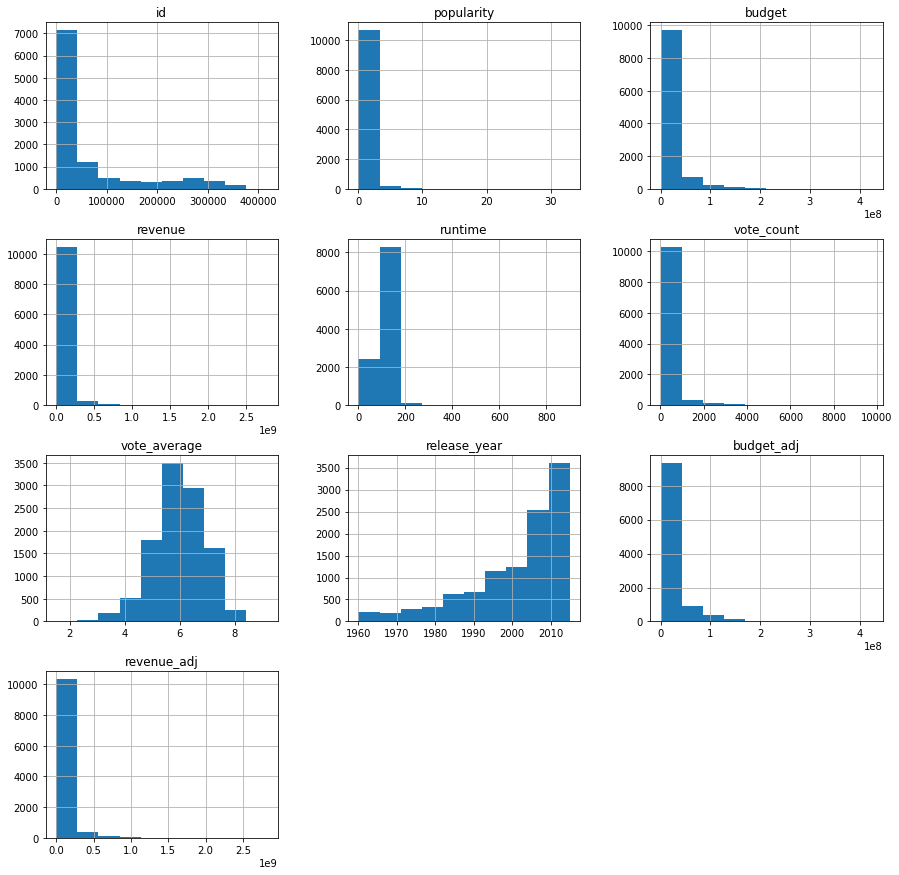

In [10]:
df.hist(figsize= (15,15));

From the result above, budget, budget_adj, popularity, revenue, revenue_adj, runtime and vote count are all skewed to the right which means Mean > Median > Mode. While release year is skewed to the left which means Mean < Median < Mode. And vote_average is a normal distribution

Now the genre has to be split since it contains multiple genres

In [11]:
df['genres'] = df['genres'].str.split('|')

In [12]:
df_genres = df.explode('genres')

df_genres.inplace=True

df_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which Genres Are Most Popular From Year To Year

The Genres column needs to be coverted into a numeric column in order to be plotted against the popularity column. We first of all need to list all unique items in the genres column so we can replace them with numeriucal values.

In [13]:
df_genres.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [14]:
print(df_genres['genres'].unique())

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' '' 'Foreign']


There are some empty rows. They will need to be dropped.

In [15]:
df_genres['genres'].replace('', np.nan, inplace=True)

df_genres.dropna(inplace=True)

To confirm

In [16]:
print(df_genres['genres'].unique())

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


In [17]:
df_genres['genres'].replace(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime',
 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War',
 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], inplace=True)

let's confirm the new dataframe

In [18]:
df_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,1,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,3,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,4,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,1,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


We still need to convert genres to numeric. At the moment, they are not recognized as numeric

In [19]:
df_genres['genres'].astype(str).astype(int)

0         1
0         2
0         3
0         4
1         1
         ..
10863    12
10863    11
10864     1
10864    11
10865    17
Name: genres, Length: 26960, dtype: int64

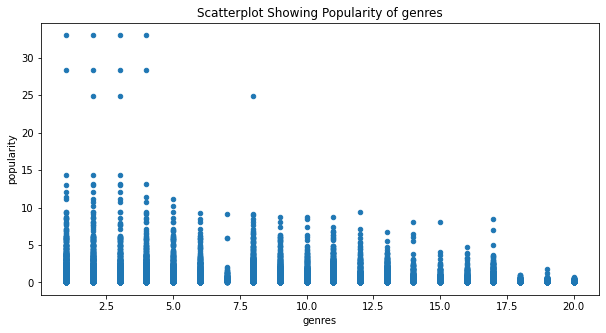

In [20]:
def scatter_plot(arg1, arg2):
    df_genres.plot(x=arg1, y=arg2, kind = 'scatter', figsize = (10,5))
    
scatter_plot('genres', 'popularity')
plt.title('Scatterplot Showing Popularity of genres');

From the scatterplot above, the genres with the most popularity are 1, 2, 3 and 4. Which are the Action, Adventure, Science Fiction, Thriller genres.

### Research Question 2: What kinds Of Properties Are Associated With Movies That Have High Revenues?

In order to answer this question, I will be plotting several scatter plots to monitor behavior of revenue against several factors like popularity, budget, runtime and release year.

Before that, I will create box plots for all properties to be used. This is to check for outliers.

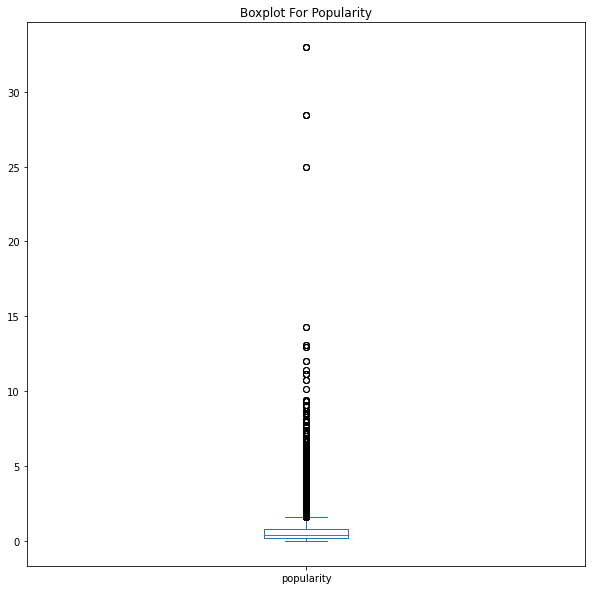

In [21]:
df_genres['popularity'].plot(kind = 'box', title='Boxplot For Popularity', figsize = (10,10));

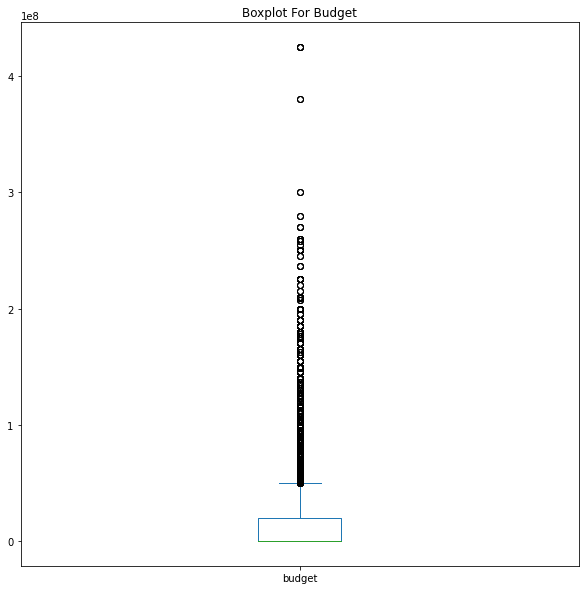

In [22]:
df_genres['budget'].plot(kind = 'box', title='Boxplot For Budget', figsize = (10,10));

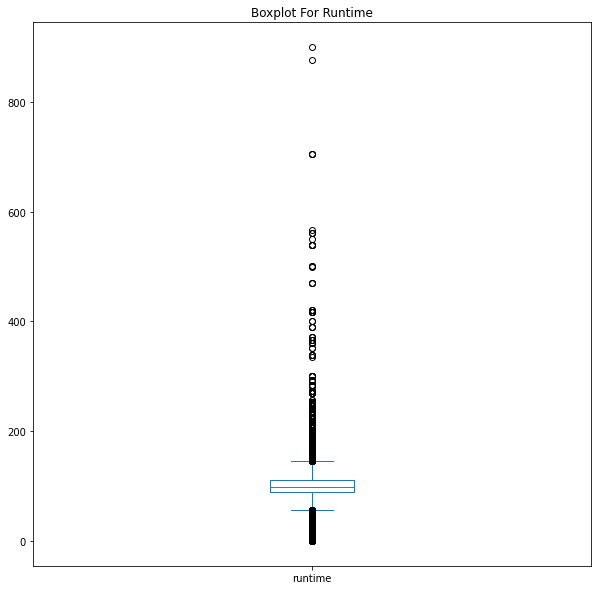

In [23]:
df_genres['runtime'].plot(kind = 'box', title='Boxplot For Runtime', figsize = (10,10));

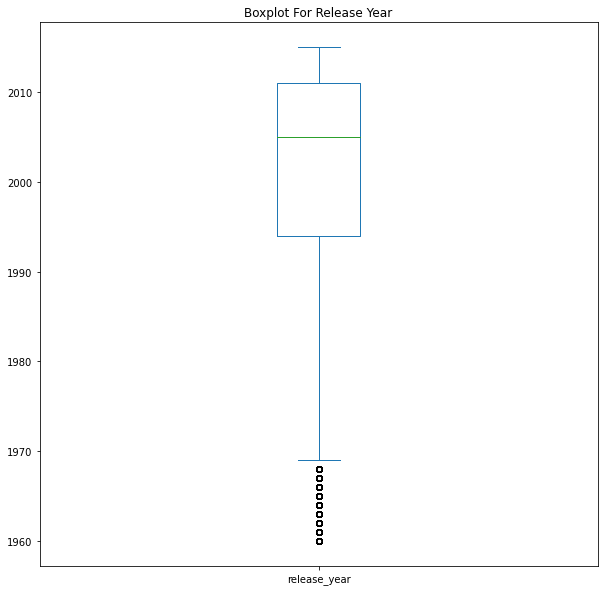

In [24]:
df_genres['release_year'].plot(kind = 'box', title='Boxplot For Release Year', figsize = (10,10));

There seem to be quite a lot of outliers, but they are insignificant, hence they will not be discarded.

Let's move on to the scatter plots

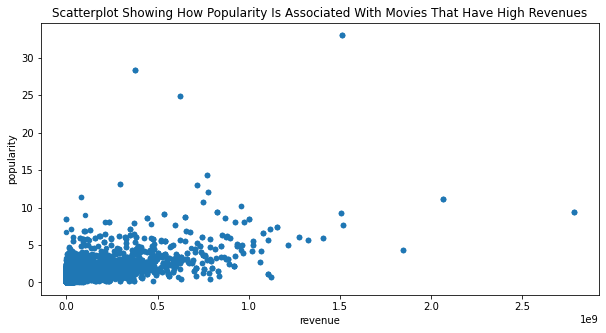

In [25]:
scatter_plot('revenue', 'popularity')
plt.title('Scatterplot Showing How Popularity Is Associated With Movies That Have High Revenues');

From this plot, it seems popularity of a movie has no effect on its revenue. 

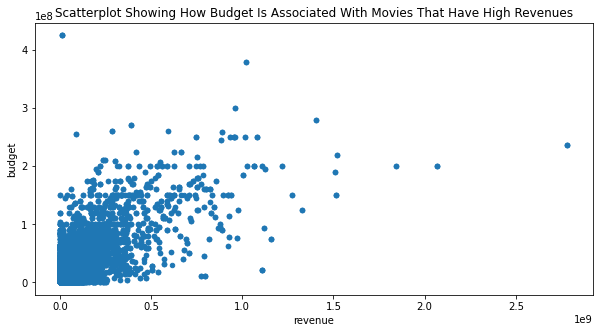

In [26]:
scatter_plot('revenue', 'budget')
plt.title('Scatterplot Showing How Budget Is Associated With Movies That Have High Revenues');

From this plot, movies with average budgets generate the most revenue and the higher the budget, the lower the revenue generated.

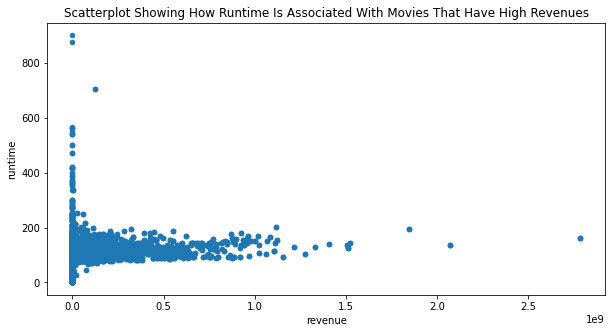

In [27]:
scatter_plot('revenue', 'runtime')
plt.title('Scatterplot Showing How Runtime Is Associated With Movies That Have High Revenues');

From this plot, it seems movies with longer runtime are less likely to have high revenues.

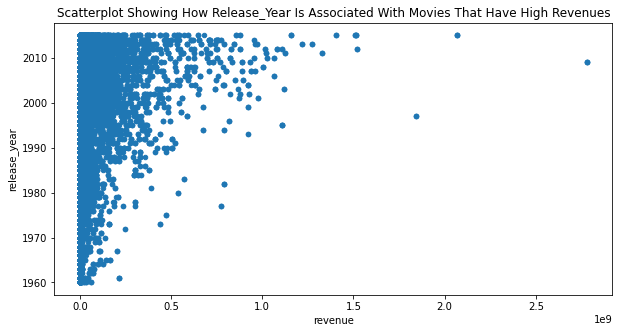

In [28]:
scatter_plot('revenue', 'release_year')
plt.title('Scatterplot Showing How Release_Year Is Associated With Movies That Have High Revenues');

From this plot, more money has been raised from movies over the years. And as the years go by, more movies will generate higher revenues.

<a id='conclusions'></a>
## Conclusions

1. Using Scatterplot, I was able to identify 4 movie genres, Action, Adventure, Science Fiction, Thriller as the most popular genres over the years in study.

2. Also using scatterplot, I was able to discover 4 things. The popularity of a movie has no effect on its revenue. Movies with average budgets generate the most revenue and infact, the higher the budget, the lower the revenue generated. Movies with longer runtime are less likely to have high revenues. And finally, more money has been raised from movies over the years. This could be due to several factors including more interest in movies, a better economy enabling more people spend more on movies, etc. And as the years go by if all factors are kept constant, more money will be spent on movies and movies will generate higher revenues. 

Additional research could be carried out on revenue raised by location, age group of people seeing the movies, etc.

My amateur knowledge of data analysis was my major limitation. But I believe over time, I will get better at this.